In [1]:
import random
import seaborn as sns
import pandas as pd
sns.set_style("darkgrid")

In [42]:
# create deck
null     = 1
minustwo = 0
minusone = 1
zero     = 6
plusone  = 5
plustwo  = 5
plusthree = 0
plusfour = 0
crit     = 5
rollzero = 0
rollone = 0
rolltwo = 0

cards = [null,minustwo,minusone,zero,plusone,plustwo,plusthree,plusfour,crit,rollzero,rollone,rolltwo]

deck = []
n = 0
for x in cards:
    i = 0
    if n == 0:
        while x > i:
            deck.append(['NULL',0])
            i = i + 1
        n = n + 1
    elif n == 8:
        while x > i:
            deck.append(['CRIT',0])
            i = i + 1
        n = n + 1
    elif n > 0 and n < 8:
        while x > i:
            deck.append([n-3,0])
            i = i + 1
        n = n + 1
    else:
        while x > i:
            deck.append([n-9,1])
            i = i + 1
        n = n + 1

# set number of cycles
t = 100000
basedmg = 5

Average damage 6.54964


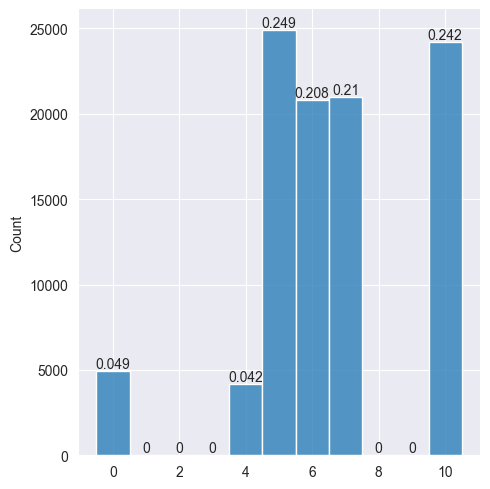

In [43]:
# function of drawing without advantage
def draw(dklst,count,cycle,bd):
    global data,k
    while len(dklst) > 0 and count < cycle:
        i = [0,1]
        stk = 0
        while i[1] == 1:
            i = dklst.pop(0) 
            if i[0] == 'NULL':
                data.append(0)
                if i[1] == 0:
                    dklst = []
                count = count + 1
            elif i[0] == 'CRIT':
                data.append(2*(bd+stk))
                if i[1] == 0:
                    dklst = []
                count = count + 1
            elif i[1] == 1:
                stk = stk + i[0]
            else: 
                data.append(basedmg + i[0] + stk)
                stk = 0
                count = count + 1
    k = count

# shuffle deck when required and keep drawing until 't' times
k = 0
data = []
while k < t:
    testdeck = deck[:]
    random.shuffle(testdeck)
    draw(testdeck,k,t,basedmg)

# sort data
data = pd.Series(data)
freq = data.value_counts()
freq = freq.sort_index()
for x in freq.index:
    freq[x] = freq[x]/t

lfreq = []
i = 0
for x in range(freq.last_valid_index() + 1):
    if x != freq.index[i]:
        lfreq.append(0)
    else:
        lfreq.append(round(freq[x],3))     
        i = i + 1

# plot graph
ax = sns.displot(data=data,discrete=True)
ax.axes.ravel()[0].bar_label(ax.axes.ravel()[0].containers[0],labels=list(lfreq))

avg = 0
for x in freq.index:
    avg = avg + freq[x]*x
print("Average damage", avg)

Average damage 8.28107


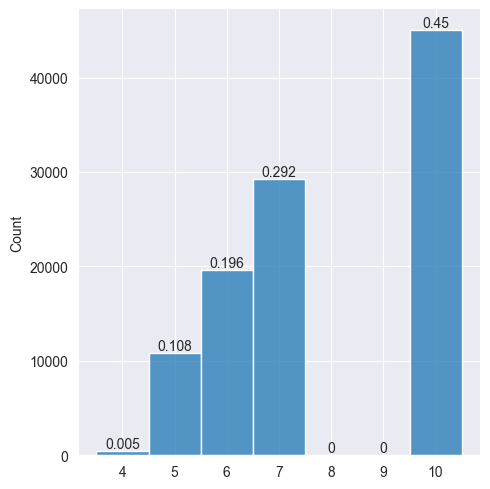

In [52]:
# function of drawing with advantage
def draw2(dklst,count,bd,comp):
    global data,k
    dmg = 0
    cmpr = False
    while cmpr == True or len(comp) < 2:
        i = dklst.pop(0) 
        comp.append(i)
        try:
            if comp[-2][1] == 1:
                cmpr = True
            else:
                cmpr = False
        except:
            pass

    if comp[-2][0] == 'NULL' and comp[-1][0] == 'NULL':
        data.append(0)
        dklst = []
        count = count + 1
    elif comp[-2][0] == 'NULL' and isinstance(comp[-1][0],int):
        for x in comp[:-2]:
            dmg = dmg + x[0]
        dmg = dmg + comp[-1][0]
        data.append(dmg + bd)
        dklst = []
        count = count + 1
    elif comp[-1][0] == 'NULL' and isinstance(comp[-2][0],int):
        for x in comp[:-1]:
            dmg = dmg + x[0]
        data.append(dmg + bd)
        dklst = []
        count = count + 1
    elif comp[-2][0] == 'CRIT' and comp[-1][0] == 'CRIT':
        x = 0
        while x < (len(comp)-2):
            dmg = dmg + comp[x][0]
            x = x + 1
        data.append(2*(bd + dmg))
        dklst = []
    elif (comp[-2][0] == 'CRIT' or comp[-1][0] == 'CRIT') and (comp[-1][0] == 'NULL' or comp[-2][0] == 'NULL'):
        x = 0
        while x < (len(comp)-2):
            dmg = dmg + comp[x][0]
            x = x + 1
        data.append(2*(bd + dmg))
        dklst = []
        count = count + 1
    elif comp[-2][0] == 'CRIT':
        x = 0
        while x < (len(comp)-2):
            dmg = dmg + comp[x][0]
            x = x + 1
        data.append(max(2*(bd + dmg),bd + dmg + comp[-1][0]))
        dklst = []
        count = count + 1
    elif comp[-1][0] == 'CRIT':
        x = 0
        while x < (len(comp)-2):
            dmg = dmg + comp[x][0]
            x = x + 1
        data.append(max(2*(bd + dmg),bd + dmg + comp[-2][0]))
        dklst = []
        count = count + 1
    else:
        x = 0
        while x < (len(comp)-2):
            dmg = dmg + comp[x][0]
            x = x + 1
        data.append(max(bd + dmg + comp[-2][0],bd + dmg + comp[-1][0]))
        count = count + 1
    k = count
    return dklst

# shuffle deck when required and keep drawing until 't' times
k = 0
data = []
while k < t:
    testdeck = deck[:]
    random.shuffle(testdeck)
    while len(testdeck) > 0 and k < t:
        testdeck = draw2(testdeck,k,basedmg,[])

# sort data
data = pd.Series(data)
freq = data.value_counts()
freq = freq.sort_index()
for x in freq.index:
    freq[x] = freq[x]/t

lfreq = []
i = 0
for x in range(freq.last_valid_index() + 1):
    if x != freq.index[i] and len(lfreq) == 0:
        pass
    elif x != freq.index[i]:
        lfreq.append(0)
    else:
        lfreq.append(round(freq[x],3)) 
        i = i + 1    

# plot graph
ax = sns.displot(data=data,discrete=True)
ax.axes.ravel()[0].bar_label(ax.axes.ravel()[0].containers[0],labels=list(lfreq))

avg = 0
for x in freq.index:
    avg = avg + freq[x]*x
print("Average damage", avg)

In [ ]:
# function of drawing with disadvantage
def draw2dis(dklst,count,bd,comp):
    global data,k
    dmg = 0
    cmpr = False
    while cmpr == True or len(comp) < 2:
        i = dklst.pop(0) 
        comp.append(i)
        try:
            if comp[-2][1] == 1:
                cmpr = True
            else:
                cmpr = False
        except:
            pass

    if comp[-2][0] == 'NULL' or comp[-1][0] == 'NULL':
        data.append(0)
        dklst = []
        count = count + 1
    elif comp[-2][0] == 'CRIT' and comp[-1][0] == 'CRIT':
        data.append(2 * bd)
        dklst = []
        count = count + 1
    elif comp[-2][0] == 'CRIT':
        data.append(min(2 * bd,bd + comp[-1][0]))
        dklst = []
        count = count + 1
    elif comp[-1][0] == 'CRIT':
        data.append(min(2 * bd,bd + comp[-2][0]))
        dklst = []
        count = count + 1
    else:
        data.append(min(bd + comp[-2][0],bd + comp[-1][0]))
        count = count + 1
    k = count
    return dklst

# shuffle deck when required and keep drawing until 't' times
k = 0
data = []
while k < t:
    testdeck = deck[:]
    random.shuffle(testdeck)
    while len(testdeck) > 0 and k < t:
        testdeck = draw2dis(testdeck,k,basedmg,[])

# sort data
data = pd.Series(data)
freq = data.value_counts()
freq = freq.sort_index()
for x in freq.index:
    freq[x] = freq[x]/t

lfreq = []
i = 0
for x in range(freq.last_valid_index() + 1):
    if x != freq.index[i] and len(lfreq) == 0:
        pass
    elif x != freq.index[i]:
        lfreq.append(0)
    else:
        lfreq.append(round(freq[x],3)) 
        i = i + 1    

# plot graph
ax = sns.displot(data=data,discrete=True)
ax.axes.ravel()[0].bar_label(ax.axes.ravel()[0].containers[0],labels=list(lfreq))

avg = 0
for x in freq.index:
    avg = avg + freq[x]*x
print("Average damage", avg)

TypeError: unsupported operand type(s) for +: 'int' and 'str'